# Q-1


1-Investigate the data and do any necessary data cleaning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  scipy.stats import zscore
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
house_train = pd.read_csv("house_train.csv")

In [4]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
for col in house_train.columns:
    print(house_train[col].name,":",sum(pd.isnull(house_train[col])))

Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 81
GarageCond : 81
PavedDrive : 0
WoodDeckSF :

In [6]:
numeric = house_train.select_dtypes(exclude=['object'])
for n,c in numeric.items():
    numeric[n]= c.fillna(c.median())

In [7]:
object = house_train.select_dtypes(exclude=["number"])
for n,c in object.items():
    object[n]= c.fillna(c.mode()[0])


In [8]:
all_data =  pd.concat([numeric,object],  axis=1)
all_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,

# Q-2

2-Explore the data and find some variables that you think would be useful in the prediction of the house prices.


In [9]:
all_data["central_air"]=pd.get_dummies(all_data["CentralAir"], drop_first=True)


In [10]:
all_data.corr()["SalePrice"].reset_index()

,index,SalePrice
0,Id,-0.021917
1,MSSubClass,-0.084284
2,LotFrontage,0.334771
3,LotArea,0.263843
4,OverallQual,0.790982
5,OverallCond,-0.077856
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
8,MasVnrArea,0.472614
9,BsmtFinSF1,0.386420


En büyük korelasyona sahip değişkenlere bakarım. Bunlar için belirlediğim sınıf 0.5'ten büyük olması. GrLivArea, OverallQual

# Q-3


3- Build your initial model using these features and estimate the parameters using OLS.


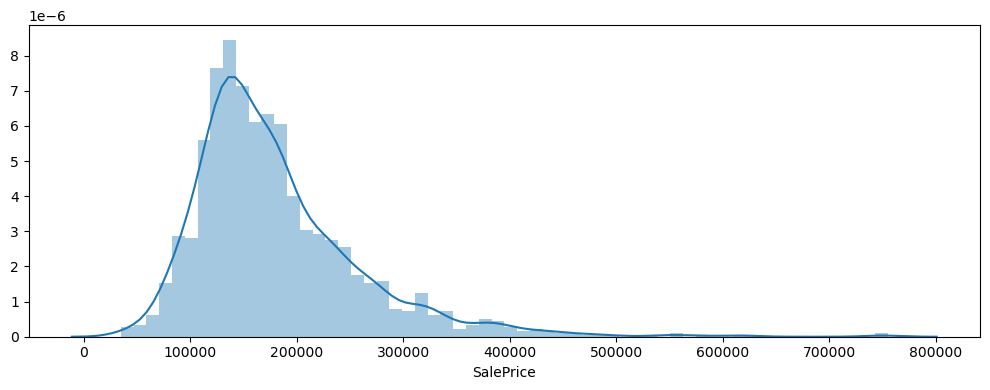

In [19]:
plt.figure(figsize=(10,4),dpi=100)
sns.distplot(all_data.SalePrice.dropna(), bins=60)
plt.tight_layout()
plt.show()

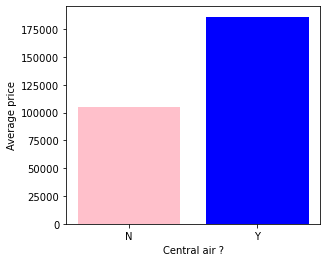

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(all_data.groupby("CentralAir")["SalePrice"].mean().index, all_data.groupby("CentralAir")["SalePrice"].mean(),
       color=("pink","blue"))
plt.ylabel("Average price")
plt.xlabel("Central air ?")
plt.xticks([0,1])
plt.show()

In [29]:
all_data["centralAir_"]=pd.get_dummies(all_data["CentralAir"], drop_first=True)

Y = all_data["SalePrice"]
X = all_data[["centralAir_","OverallQual","GrLivArea","LotArea","1stFlrSF"]]

In [30]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression()

In [31]:
print("\nCoefficients:\n",lrm.coef_)
print("\nIntercept:\n",lrm.intercept_)


Coefficients:
 [1.74581411e+04 3.00978041e+04 4.17953491e+01 6.60153509e-01
 3.43256131e+01]

Intercept:
 -129166.89033377371


In [32]:
X= sm.add_constant(X)
results = sm.OLS(Y,X).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     858.9
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:35:26   Log-Likelihood:                -17541.
No. Observations:                1460   AIC:                         3.509e+04
Df Residuals:                    1454   BIC:                         3.512e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.292e+05   5616.978    -22.996      0.000    -1.4e+05   -1.18e+05
centralAir_  1.746e+04   4440.774      3.931      0.000    8747.132    2.62e+04
OverallQual   3.01e+04   1001.713     30.046      0.000    2.81e+04    3.21e+04
GrLivArea      41.7953      2.752     15.188      0.000      36.397      47.194
LotArea         0.6602      0.112      5.918      0.000       0.441       0.879
1stFlrSF       34.3256      3.444      9.967      0.000      27.570      41.082
==============================================================================
Omnibus:                      404.794   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31045.593
Skew:                          -0.240   Prob(JB):                         0.00
Kurtosis:                      25.586   Cond. No.                     8.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""